# Book version 따라가기
- 일단 무지성으로 책에 있는것 그대로 따라 해 보기
- https://www.learnpytorch.io/04_pytorch_custom_datasets/

In [85]:
import torch
import torch.nn

# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f'device = {device}')

device = cuda


In [86]:
# Download data

import requests
import zipfile
import pathlib

# Setup path to data folder
data_path = pathlib.Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it... 
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    
    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...") 
        zip_ref.extractall(image_path)

data/pizza_steak_sushi directory exists.


Random image path: data/pizza_steak_sushi/test/pizza/1503858.jpg
Image class: pizza
Image height: 384
Image width: 512


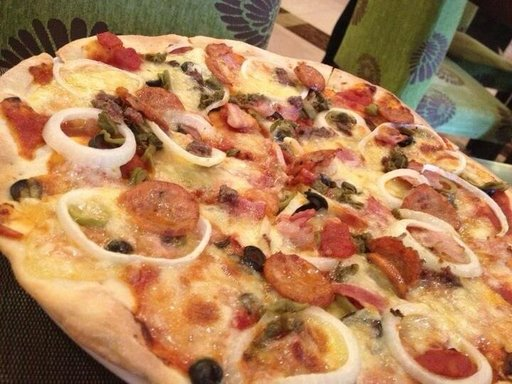

In [87]:
# Show random image from data

import random
import PIL.Image

# 1. Get all image paths (* means "any combination")
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Get random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = PIL.Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}") 
print(f"Image width: {img.width}")

img.show()

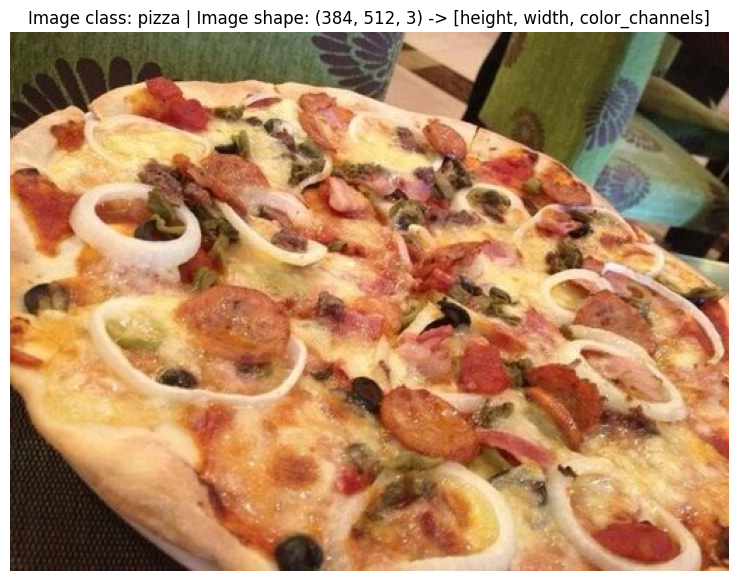

In [88]:
# use matplotlib to view the image
import numpy
import matplotlib.pyplot

# Turn the image into an array
img_as_array = numpy.asarray(img)

# Plot the image with matplotlib
matplotlib.pyplot.figure(figsize=(10, 7))
matplotlib.pyplot.imshow(img_as_array)
matplotlib.pyplot.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
matplotlib.pyplot.axis(False);
matplotlib.pyplot.show()

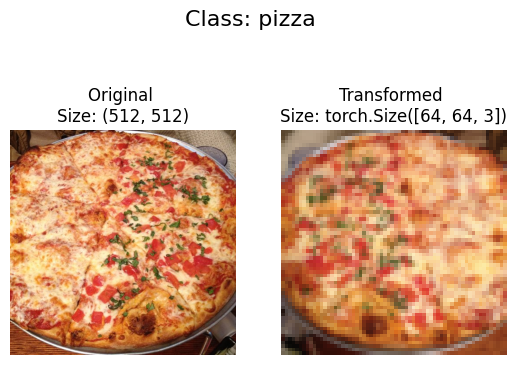

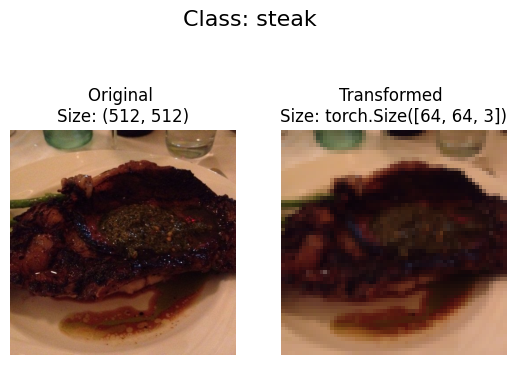

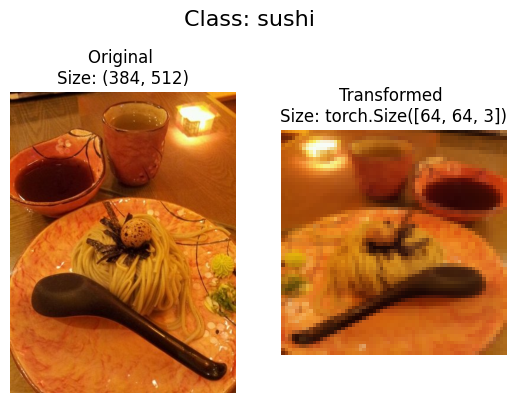

In [89]:
import matplotlib.pyplot
import PIL.Image

import random

import torch
import torch.utils.data
import torchvision

# Write transform for image
data_transform = torchvision.transforms.Compose([
    # Resize the images to 64x64
    torchvision.transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal
    torchvision.transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip, 0.5 = 50% chance
    # Turn the image into a torch.Tensor
    torchvision.transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0 
])

def plot_transformed_images(image_paths, transform, n=3):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths. 
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with PIL.Image.open(image_path) as f:
            fig, ax = matplotlib.pyplot.subplots(1, 2)
            ax[0].imshow(f) 
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib 
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0) 
            ax[1].imshow(transformed_image) 
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list, 
                        transform=data_transform, 
                        n=3)

In [90]:
# 4. Option 1: Loading Image Data using ImageFolder

import torchvision.datasets

train_dir = 'data/pizza_steak_sushi/train'
test_dir = 'data/pizza_steak_sushi/test'

train_data = torchvision.datasets.ImageFolder(root=train_dir, # target folder of images
                                  transform=data_transform, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)

test_data = torchvision.datasets.ImageFolder(root=test_dir, 
                                 transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [91]:
# Dataset이 되었으므로 다음과 같은 operation이 가능하다

# Get class names as a list
class_names = train_data.classes
print(f'class_names: {class_names}')

class_dict = train_data.class_to_idx
print(f'class_dict: {class_dict}')

print(f'len(train_data): {len(train_data)}')
print(f'len(test_data): {len(test_data)}')

img, label = train_data[0]

print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

class_names: ['pizza', 'steak', 'sushi']
class_dict: {'pizza': 0, 'steak': 1, 'sushi': 2}
len(train_data): 225
len(test_data): 75
Image tensor:
tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.01

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute shape: torch.Size([64, 64, 3]) -> [height, width, color_channels]


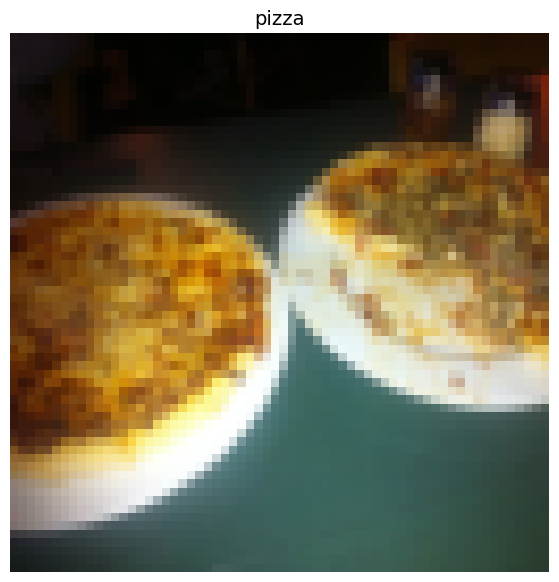

In [92]:
# Rearrange the order of dimensions
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
matplotlib.pyplot.figure(figsize=(10, 7))
matplotlib.pyplot.imshow(img.permute(1, 2, 0))
matplotlib.pyplot.axis("off")
matplotlib.pyplot.title(class_names[label], fontsize=14)
matplotlib.pyplot.show()

In [93]:
# ImageFolder로 만든 dataset을 DataLoader화 한다
# DataLoader화 하면 dataset이 iterable하게 되며 batch_size, shuffle, num_worker 등을 설정할 수 있다

# 여기에서 num_worker라는 것은 DataLoader가 데이터를 불러올 때 몇 개의 process를 사용할 것인지를 의미한다
# os.cpu_count()로 하는게 일반적으로 가장 효율적으로 CPU를 사용하는 방법이다

import torch.utils.data

train_dataloader = torch.utils.data.DataLoader(
                        dataset=train_data, 
                        batch_size=1, # how many samples per batch?
                        num_workers=1, # how many subprocesses to use for data loading? (higher = more)
                        shuffle=True) # shuffle the data?

test_dataloader = torch.utils.data.DataLoader(
                        dataset=test_data, 
                        batch_size=1, 
                        num_workers=1, 
                        shuffle=False) # don't usually need to shuffle testing data

print(f"Length of train_dataloader: {len(train_dataloader)}")
print(f"Length of test_dataloader: {len(test_dataloader)}")

Length of train_dataloader: 225
Length of test_dataloader: 75


### Loading Image Data with a Custom Dataset
- pre-build Dataset이 없다면 자신이 직접 만들수 있다
- 이 pre-built 가 있다는 가정하에서 custom Dataset을 만드는 것은 다음의 장단점이 있다

- 장점
    - 거의 모든 종류의 Data에 대해 Dataset을 만들 수 있음
    - PyTorch pre-built Dataset function의 한계를 벗어난 것을 만들 수 있음
- 단점
    - 내가 만든다고 해서 꼭 잘 동작한다는 보장은 없다 (ㅋㅋㅋㅋㅋㅋ;)
    - Custom Dataset을 만든다는건 코딩을 더 한다는 것이고 그럼 에러나 성능 문제가 생길 여지가 더 많다

In [94]:
# ImageFolder와 비슷한 dataset을 자체적으로 만들어 보자

import os
import pathlib
import torch

import PIL # Image
import torch.utils.data # Dataset
import torchvision # transforms

# Setup path to data folder
data_path = pathlib.Path("data/")
image_path = data_path / "pizza_steak_sushi"

# Setup path for target directory
target_directory = train_dir
print(f"Target directory: {target_directory}")

# Get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(image_path / "train"))])
print(f"Class names found: {class_names_found}")

Target directory: data/pizza_steak_sushi/train
Class names found: ['pizza', 'steak', 'sushi']


In [95]:
# python 3.9 부터는 typing을 사용하지 않아도 typing을 할 수 있다

# Make function to find classes in target directory
def find_classes(directory: str) -> tuple[list[str], dict[str, int]]:
    """Finds the class folder names in a target directory.
    
    Assumes target directory is in standard image classification format.

    Args:
        directory (str): target directory to load classnames from.

    Returns:
        Tuple[List[str], Dict[str, int]]: (list_of_class_names, dict(class_name: idx...))
    
    Example:
        find_classes("food_images/train")
        >>> (["class_1", "class_2"], {"class_1": 0, ...})
    """
    # 1. Get the class names by scanning the target directory
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
    
    # 2. Raise an error if class names not found
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}.")
        
    # 3. Create a dictionary of index labels (computers prefer numerical rather than string labels)
    class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
    return classes, class_to_idx

print(find_classes(train_dir))
print(find_classes(test_dir))

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})
(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})


In [96]:
# Write a custom dataset class (inherits from torch.utils.data.Dataset)
import pathlib
import PIL

import torch.utils.data

# 1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(torch.utils.data.Dataset):
    
    # 2. Initialize with a targ_dir and transform (optional) parameter
    def __init__(self, targ_dir: str, transform=None) -> None:
        
        # 3. Create class attributes
        # Get all image paths
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg")) # note: you'd have to update this if you've got .png's or .jpeg's
        # Setup transforms
        self.transform = transform
        # Create classes and class_to_idx attributes
        self.classes, self.class_to_idx = find_classes(targ_dir)

    # 4. Make function to load images
    def load_image(self, index: int) -> PIL.Image.Image:
        "Opens an image via a path and returns it."
        image_path = self.paths[index]
        return PIL.Image.open(image_path) 
    
    # 5. Overwrite the __len__() method (optional but recommended for subclasses of torch.utils.data.Dataset)
    def __len__(self) -> int:
        "Returns the total number of samples."
        return len(self.paths)
    
    # 6. Overwrite the __getitem__() method (required for subclasses of torch.utils.data.Dataset)
    def __getitem__(self, index: int) -> tuple[torch.Tensor, int]:
        "Returns one sample of data, data and label (X, y)."
        img = self.load_image(index)
        class_name  = self.paths[index].parent.name # expects path in data_folder/class_name/image.jpeg
        class_idx = self.class_to_idx[class_name]

        # Transform if necessary
        if self.transform:
            return self.transform(img), class_idx # return data, label (X, y)
        else:
            return img, class_idx # return data, label (X, y)

In [97]:
import torchvision

# Augment train data
train_transforms = torchvision.transforms.Compose([
    torchvision.transforms.Resize((64, 64)),
    torchvision.transforms.RandomHorizontalFlip(p=0.5),
    torchvision.transforms.ToTensor()
])

# Don't augment test data, only reshape
test_transforms = torchvision.transforms.Compose([
    torchvision.transforms.Resize((64, 64)),
    torchvision.transforms.ToTensor()
])

train_data_custom = ImageFolderCustom(targ_dir=train_dir, 
                                      transform=train_transforms)
test_data_custom = ImageFolderCustom(targ_dir=test_dir, 
                                     transform=test_transforms)

print(f"Length of train_data_custom: {len(train_data_custom)}")
print(f"Length of test_data_custom: {len(test_data_custom)}")

print(train_data_custom.classes)
print(train_data_custom.class_to_idx)

Length of train_data_custom: 225
Length of test_data_custom: 75
['pizza', 'steak', 'sushi']
{'pizza': 0, 'steak': 1, 'sushi': 2}


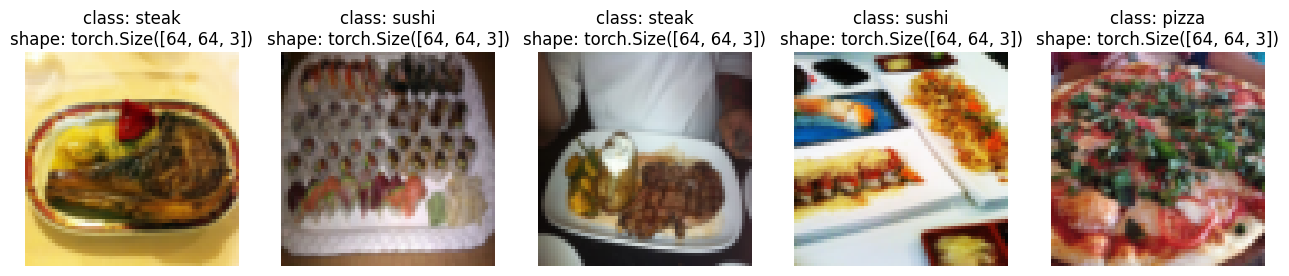

In [98]:
# 1. Take in a Dataset as well as a list of class names
def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes: list[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
    
    # 2. Adjust display if n too high
    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")
    
    # 3. Set random seed
    if seed:
        random.seed(seed)

    # 4. Get random sample indexes
    random_samples_idx = random.sample(range(len(dataset)), k=n)

    # 5. Setup plot
    matplotlib.pyplot.figure(figsize=(16, 8))

    # 6. Loop through samples and display random samples 
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        # 7. Adjust image tensor shape for plotting: [color_channels, height, width] -> [color_channels, height, width]
        targ_image_adjust = targ_image.permute(1, 2, 0)

        # Plot adjusted samples
        matplotlib.pyplot.subplot(1, n, i+1)
        matplotlib.pyplot.imshow(targ_image_adjust)
        matplotlib.pyplot.axis("off")
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        matplotlib.pyplot.title(title)

    matplotlib.pyplot.show()

display_random_images(train_data_custom, n=5, classes=train_data_custom.classes, seed=None)

In [99]:
# Turn train and test custom Dataset's into DataLoader's

import torch.utils.data

train_dataloader_custom = torch.utils.data.DataLoader(
                            dataset=train_data_custom, # use custom created train Dataset
                            batch_size=1, # how many samples per batch?
                            num_workers=0, # how many subprocesses to use for data loading? (higher = more)
                            shuffle=True) # shuffle the data?

test_dataloader_custom = torch.utils.data.DataLoader(
                            dataset=test_data_custom, # use custom created test Dataset
                            batch_size=1, 
                            num_workers=0, 
                            shuffle=False) # don't usually need to shuffle testing data

print(train_dataloader_custom)
print(test_dataloader_custom)

# Get image and label from custom DataLoader
img_custom, label_custom = next(iter(train_dataloader_custom))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img_custom.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label_custom.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


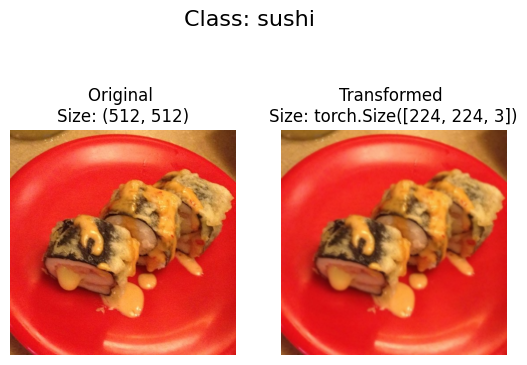

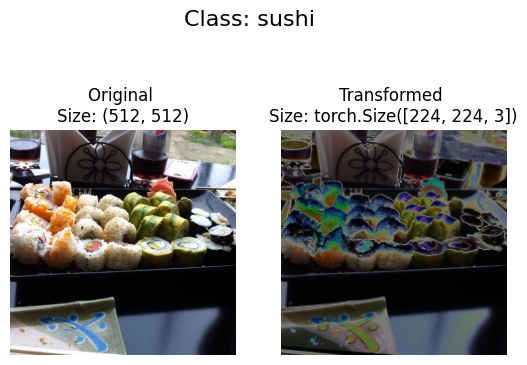

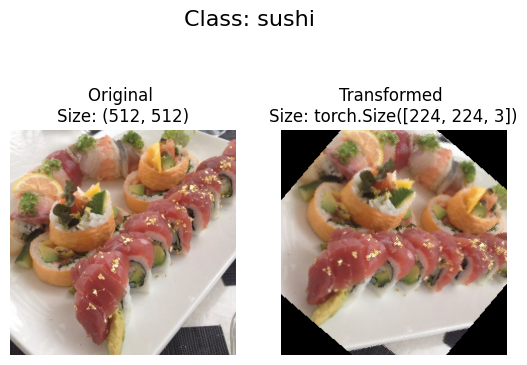

In [100]:
# Data augmentation
# TrivialAugment라는게 있는데 이게 model의 성능에 상당한 기여를 한다
# 이게 하는건 간단한데, 이미지를 랜덤하게 crop하고 flip하고 rotate하고 brightness를 조절하고 이런 것들이다
# 이런 것들은 모델이 더 robust하게 만들어 준다

import torchvision

train_transforms = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224, 224)),
    torchvision.transforms.TrivialAugmentWide(num_magnitude_bins=31), # how intense 
    torchvision.transforms.ToTensor() # use ToTensor() last to get everything between 0 & 1
])

# Don't need to perform augmentation on the test data
test_transforms = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224, 224)), 
    torchvision.transforms.ToTensor()
])

# Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# Plot random images
plot_transformed_images(
    image_paths=image_path_list,
    transform=train_transforms,
    n=3,
)

In [101]:
import os
import torchvision
import torch.utils.data

# Create simple transform
simple_transform = torchvision.transforms.Compose([ 
    torchvision.transforms.Resize((64, 64)),
    torchvision.transforms.ToTensor(),
])

# 1. Load and transform data
train_data_simple = torchvision.datasets.ImageFolder(root=train_dir, transform=simple_transform)
test_data_simple = torchvision.datasets.ImageFolder(root=test_dir, transform=simple_transform)

# 2. Turn data into DataLoaders
# Setup batch size and number of workers 
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
print(f"Creating DataLoader's with batch size {BATCH_SIZE} and {NUM_WORKERS} workers.")

# Create DataLoader's
train_dataloader_simple = torch.utils.data.DataLoader(
                            train_data_simple, 
                            batch_size=BATCH_SIZE, 
                            shuffle=True, 
                            num_workers=NUM_WORKERS)

test_dataloader_simple = torch.utils.data.DataLoader(
                            test_data_simple, 
                            batch_size=BATCH_SIZE, 
                            shuffle=False, 
                            num_workers=NUM_WORKERS)

print(train_dataloader_simple)
print(test_dataloader_simple)

Creating DataLoader's with batch size 32 and 20 workers.


In [102]:
import torch.nn

class TinyVGG(torch.nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1), # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            torch.nn.ReLU(),
            torch.nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.conv_block_2 = torch.nn.Sequential(
            torch.nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            torch.nn.ReLU(),
            torch.nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(2)
        )
        self.classifier = torch.nn.Sequential(
            torch.nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            torch.nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x
        # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- leverage the benefits of operator fusion

model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB) 
                  hidden_units=10, 
                  output_shape=len(train_data.classes)).to(device)

print(model_0)

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)


In [103]:
# 1. Get a batch of images and labels from the DataLoader
img_batch, label_batch = next(iter(train_dataloader_simple))

# 2. Get a single image from the batch and unsqueeze the image so its shape fits the model
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

# 3. Perform a forward pass on a single image
model_0.eval()
with torch.inference_mode():
    pred = model_0(img_single.to(device))
    
# 4. Print out what's happening and convert model logits -> pred probs -> pred label
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 3, 64, 64])

Output logits:
tensor([[-0.0094,  0.0201,  0.0197]], device='cuda:0')

Output prediction probabilities:
tensor([[0.3269, 0.3366, 0.3365]], device='cuda:0')

Output prediction label:
tensor([1], device='cuda:0')

Actual label:
0


In [104]:
# 이 기능을 이용하면 모델의 전체적인 구조도 확인할 수 있고 메모리를 얼마나 사용하게 될지도, 
# 내가 메모리를 얼마나 필요로 하게 될지도 알 수 있는 듯. 아주 좋다!

import torchinfo

torchinfo.summary(model_0, input_size=(BATCH_SIZE, 3, 64, 64))

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [32, 3]                   --
├─Sequential: 1-1                        [32, 10, 32, 32]          --
│    └─Conv2d: 2-1                       [32, 10, 64, 64]          280
│    └─ReLU: 2-2                         [32, 10, 64, 64]          --
│    └─Conv2d: 2-3                       [32, 10, 64, 64]          910
│    └─ReLU: 2-4                         [32, 10, 64, 64]          --
│    └─MaxPool2d: 2-5                    [32, 10, 32, 32]          --
├─Sequential: 1-2                        [32, 10, 16, 16]          --
│    └─Conv2d: 2-6                       [32, 10, 32, 32]          910
│    └─ReLU: 2-7                         [32, 10, 32, 32]          --
│    └─Conv2d: 2-8                       [32, 10, 32, 32]          910
│    └─ReLU: 2-9                         [32, 10, 32, 32]          --
│    └─MaxPool2d: 2-10                   [32, 10, 16, 16]          --
├─Sequentia

In [105]:
def train_step(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()
    
    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0
    
    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch 
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [106]:
def test_step(model: torch.nn.Module, 
              dataloader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval() 
    
    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0
    
    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)
    
            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            
            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
            
    # Adjust metrics to get average loss and accuracy per batch 
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [107]:
import tqdm.auto

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader, 
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = torch.nn.CrossEntropyLoss(),
          epochs: int = 5):
    
    # 2. Create empty results dictionary
    results = {
        "train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }
    
    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm.auto.tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)
        
        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [108]:
# train and evaluate model 0

# Set number of epochs
NUM_EPOCHS = 5

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB) 
                  hidden_units=10, 
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model_0 
model_0_results = train(model=model_0, 
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0971 | train_acc: 0.3945 | test_loss: 1.1175 | test_acc: 0.1979
Epoch: 2 | train_loss: 1.1034 | train_acc: 0.2930 | test_loss: 1.1327 | test_acc: 0.1979
Epoch: 3 | train_loss: 1.0875 | train_acc: 0.4102 | test_loss: 1.1291 | test_acc: 0.3542
Epoch: 4 | train_loss: 1.0712 | train_acc: 0.5273 | test_loss: 1.1560 | test_acc: 0.2188
Epoch: 5 | train_loss: 1.0685 | train_acc: 0.4336 | test_loss: 1.1240 | test_acc: 0.2083
Total training time: 4.879 seconds


In [109]:
# Check the model_0_results keys
print(model_0_results.keys())

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])


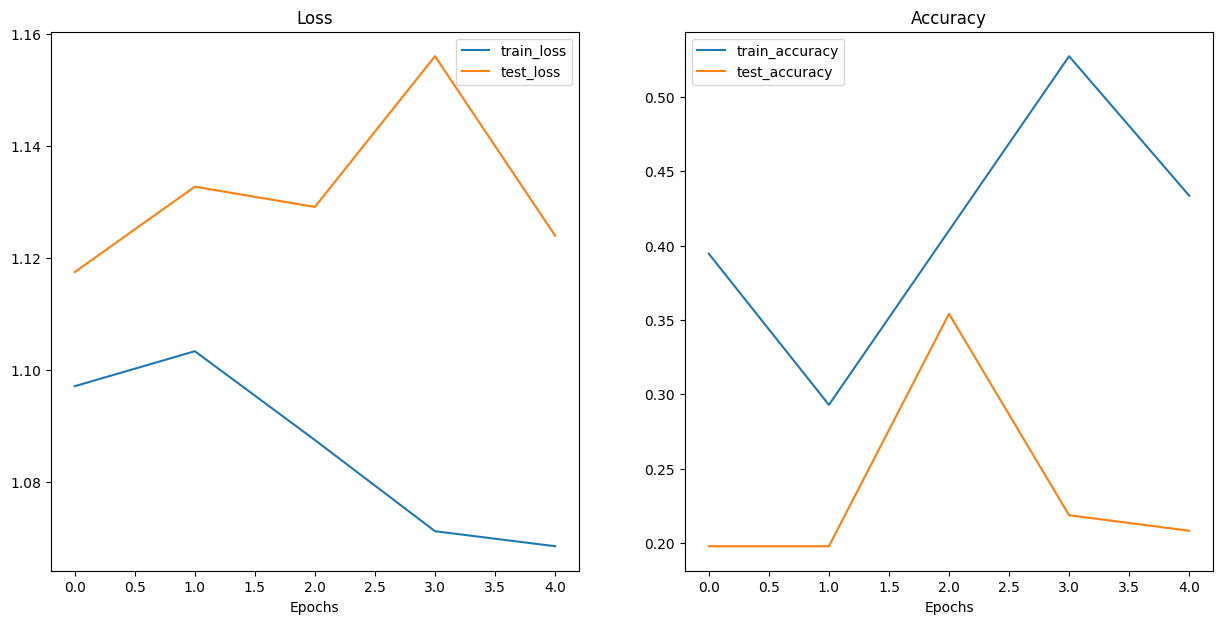

In [110]:
# Plot loss curves

def plot_loss_curves(results: dict[str, list[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
    
    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot 
    matplotlib.pyplot.figure(figsize=(15, 7))

    # Plot loss
    matplotlib.pyplot.subplot(1, 2, 1)
    matplotlib.pyplot.plot(epochs, loss, label='train_loss')
    matplotlib.pyplot.plot(epochs, test_loss, label='test_loss')
    matplotlib.pyplot.title('Loss')
    matplotlib.pyplot.xlabel('Epochs')
    matplotlib.pyplot.legend()

    # Plot accuracy
    matplotlib.pyplot.subplot(1, 2, 2)
    matplotlib.pyplot.plot(epochs, accuracy, label='train_accuracy')
    matplotlib.pyplot.plot(epochs, test_accuracy, label='test_accuracy')
    matplotlib.pyplot.title('Accuracy')
    matplotlib.pyplot.xlabel('Epochs')
    matplotlib.pyplot.legend()

plot_loss_curves(model_0_results)

# How Ideal loss curve should Look like

![How Ideal loss curve should Look like](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-loss-curves-overfitting-underfitting-ideal.jpg)

# Overfitting 에 대응하는 법
1. Get more data
    - Having more data gives the model more opportunities to learn patterns, patterns which may be more generalizable to new examples.
2. Simplify your model
    - If the current model is already overfitting the training data, it may be too complicated of a model. This means it's learning the patterns of the data too well and isn't able to generalize well to unseen data. One way to simplify a model is to reduce the number of layers it uses or to reduce the number of hidden units in each layer.
3. Use data augmentation
    - Data augmentation manipulates the training data in a way so that's harder for the model to learn as it artificially adds more variety to the data. If a model is able to learn patterns in augmented data, the model may be able to generalize better to unseen data.
4. Use transfer learning
    - Transfer learning involves leveraging the patterns (also called pretrained weights) one model has learned to use as the foundation for your own task. In our case, we could use one computer vision model pretrained on a large variety of images and then tweak it slightly to be more specialized for food images.
5. Use dropout layers
    - Dropout layers randomly remove connections between hidden layers in neural networks, effectively simplifying a model but also making the remaining connections better. See torch.nn.Dropout() for more.
6. Use learning rate decay
    - The idea here is to slowly decrease the learning rate as a model trains. This is akin to reaching for a coin at the back of a couch. The closer you get, the smaller your steps. The same with the learning rate, the closer you get to convergence, the smaller you'll want your weight updates to be.
7. Use early stopping
    - Early stopping stops model training before it begins to overfit. As in, say the model's loss has stopped decreasing for the past 10 epochs (this number is arbitrary), you may want to stop the model training here and go with the model weights that had the lowest loss (10 epochs prior).

# Underfitting에 대응하는 법
1. Add more layers/units to your model
    - If your model is underfitting, it may not have enough capability to learn the required patterns/weights/representations of the data to be predictive. One way to add more predictive power to your model is to increase the number of hidden layers/units within those layers.
2. Tweak the learning rate
    - Perhaps your model's learning rate is too high to begin with. And it's trying to update its weights each epoch too much, in turn not learning anything. In this case, you might lower the learning rate and see what happens.
3. Use transfer learning
    - Transfer learning is capable of preventing overfitting and underfitting. It involves using the patterns from a previously working model and adjusting them to your own problem.
4. Train for longer
    - Sometimes a model just needs more time to learn representations of data. If you find in your smaller experiments your model isn't learning anything, perhaps leaving it train for a more epochs may result in better performance.
5. Use less regularization
    - Perhaps your model is underfitting because you're trying to prevent overfitting too much. Holding back on regularization techniques can help your model fit the data better.

In [111]:
import torchvision

# Create training transform with TrivialAugment
train_transform_trivial_augment = torchvision.transforms.Compose([
    torchvision.transforms.Resize((64, 64)),
    torchvision.transforms.TrivialAugmentWide(num_magnitude_bins=31),
    torchvision.transforms.ToTensor() 
])

# Create testing transform (no data augmentation)
test_transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((64, 64)),
    torchvision.transforms.ToTensor()
])

# Turn image folders into Datasets
train_data_augmented = torchvision.datasets.ImageFolder(train_dir, transform=train_transform_trivial_augment)
test_data_simple = torchvision.datasets.ImageFolder(test_dir, transform=test_transform)

print(train_data_augmented)
print(test_data_simple)

Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
               ToTensor()
           )
Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
           )


In [112]:
# Turn Datasets into DataLoader's
import os
import torch.utils.data

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader_augmented = torch.utils.data.DataLoader(train_data_augmented, 
                                        batch_size=BATCH_SIZE, 
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)

test_dataloader_simple = torch.utils.data.DataLoader(test_data_simple, 
                                    batch_size=BATCH_SIZE, 
                                    shuffle=False, 
                                    num_workers=NUM_WORKERS)

print(train_dataloader_augmented)
print(test_dataloader_simple)

In [113]:
import timeit

model_1 = TinyVGG(
    input_shape=3,
    hidden_units=10,
    output_shape=len(train_data_augmented.classes)).to(device)

print(model_1)

# Set number of epochs
NUM_EPOCHS = 100

# Setup loss function and optimizer
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.0001)

# Start the timer
start_time = timeit.default_timer()

# Train model_1
model_1_results = train(model=model_1, 
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timeit.default_timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0970 | train_acc: 0.4141 | test_loss: 1.0964 | test_acc: 0.1979
Epoch: 2 | train_loss: 1.0956 | train_acc: 0.4141 | test_loss: 1.0993 | test_acc: 0.1979
Epoch: 3 | train_loss: 1.1000 | train_acc: 0.2930 | test_loss: 1.1018 | test_acc: 0.1979
Epoch: 4 | train_loss: 1.0994 | train_acc: 0.2930 | test_loss: 1.1011 | test_acc: 0.1979
Epoch: 5 | train_loss: 1.0988 | train_acc: 0.2930 | test_loss: 1.0990 | test_acc: 0.1979
Epoch: 6 | train_loss: 1.0956 | train_acc: 0.4141 | test_loss: 1.0968 | test_acc: 0.1979
Epoch: 7 | train_loss: 1.0956 | train_acc: 0.4141 | test_loss: 1.0974 | test_acc: 0.1979
Epoch: 8 | train_loss: 1.0945 | train_acc: 0.4141 | test_loss: 1.0990 | test_acc: 0.1979
Epoch: 9 | train_loss: 1.0930 | train_acc: 0.4141 | test_loss: 1.1011 | test_acc: 0.1979
Epoch: 10 | train_loss: 1.0998 | train_acc: 0.2930 | test_loss: 1.1030 | test_acc: 0.1979
Epoch: 11 | train_loss: 1.1055 | train_acc: 0.2930 | test_loss: 1.1015 | test_acc: 0.1979
Epoch: 12 | train_l

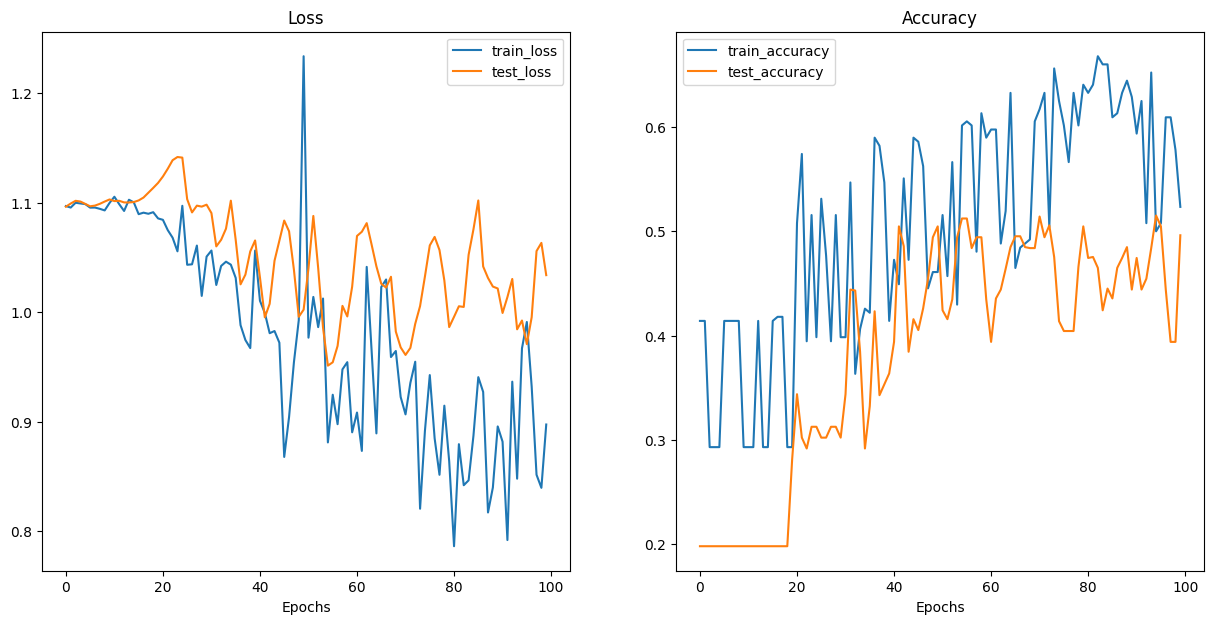

In [114]:
# 보면 epoch 늘리고 learning rate 낮추는게 효과가 있긴 한데 엄청 불안정하다
# 뭔가 근본적인 조치가 필요한걸 알 수 있다

plot_loss_curves(model_1_results)